# Robust PCA Example

Robust PCA is an awesome relatively new method for factoring a matrix into a low rank component and a sparse component.  This enables really neat applications for outlier detection, or models that are robust to outliers.

In [4]:
%matplotlib inline

### Make Some Toy Data

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [6]:
x = np.random.randn(100) * 5
y = np.random.randn(100)
z = np.random.randn(100)
points = np.vstack([y,x,z])

### Add Some Outliers to Make Life Difficult

In [9]:
outliers = np.tile([15,-10,10], 10).reshape((-1,3))

In [10]:
pts = np.vstack([points.T, outliers]).T

### Compute SVD on both the clean data and the outliery data

In [12]:
U,s,Vt = np.linalg.svd(points)
U_n,s_n,Vt_n = np.linalg.svd(pts)

### Just 10 outliers can really screw up our line fit!

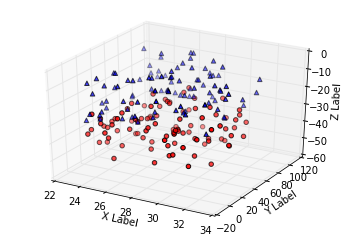

In [17]:
def randrange(n, vmin, vmax):
    return (vmax-vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 100 
for c, m, zl, zh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32) 
    ys = randrange(n, 0, 100)
    zs = randrange(n, zl, zh) 
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

### Now the robust pca version!

In [67]:
import rpca

In [68]:
reload(rpca)

<module 'rpca' from 'rpca.pyc'>

In [69]:
import logging
logger = logging.getLogger(rpca.__name__)
logger.setLevel(logging.INFO)

### Factor the matrix into L (low rank) and S (sparse) parts

In [70]:
L,S = rpca.rpca(pts, eps=0.0000001, r=1)

INFO:rpca:Number of iterations: 212 to achieve eps = 0.000000


### Run SVD on the Low Rank Part

In [71]:
U,s,Vt = np.linalg.svd(L)

### And have a look at this!

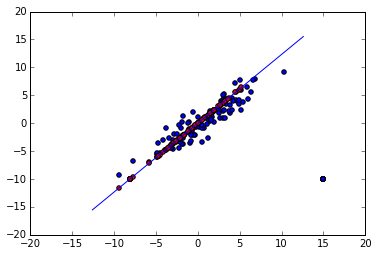

In [72]:
plt.ylim([-20,20])
plt.xlim([-20,20])
plt.scatter(*pts)
pts0 = np.dot(U[0].reshape((2,1)), np.array([-20,20]).reshape((1,2)))
plt.plot(*pts0)
plt.scatter(*L, c='red')

### Have a look at the factored components...

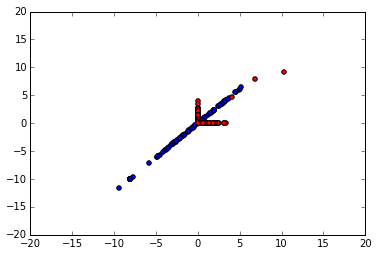

In [73]:
plt.ylim([-20,20])
plt.xlim([-20,20])
plt.scatter(*L)
plt.scatter(*S, c='red')

### It really does add back to the original matrix!

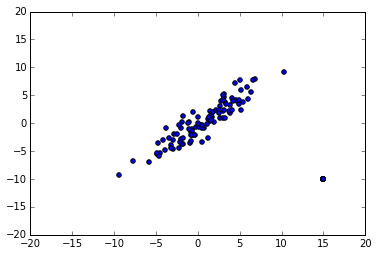

In [74]:
plt.ylim([-20,20])
plt.xlim([-20,20])
plt.scatter(*(L+S))